In [1]:
import konlpy
import pandas as pd

In [2]:
from konlpy.tag import Kkma
from konlpy.tag import Komoran

In [3]:
with open('category1_merge.txt', 'r', encoding='UTF8') as f:
    lines = f.read().splitlines()
lines

['아~남편분이 누구신가 어디서봤지 했는데 카레이서 서주원씨구나~ㅎ',
 '언니 원피스 정보 뭔지 알려주세요ㅎㅎ!!!!!',
 '오늘 처음봤는데 되게 속이 꽉 찬 분 같아요 사랑스러움이 흘러 넘쳐,,,ㅠㅠ 보는내내 행복해 남편분도 다방면으로 지식이 풍부하신 것 같고 둘이 티키타카 잘되는듯 너모 잘 어울려요',
 '처음 이 유투브 들어왔는데 여자분 참 긍정적이신 것 같아요 얼굴까지 예쁘고~~ 알콩달콩 사는 모습이 좋아보여요!^^',
 '헤엑  10초 건너뛰기 하면서 봤더니 생얼인줄 몰랐어요오오옹 ,,,, ㅋㄱㅋㄱㅋㄱㅋ',
 '와..대한항공 턱주가리돌려버리는 클래스네요..',
 '어느 좌석으로 가든 비행기를 탄다는 것만으로 넘 신나는거같아요! 여행 느므 좋은것 +_+',
 '진짜 아옳이님은 행복하기도 하지만 그 행복을 나눌 줄 아는 사람 같아서 좋아요',
 '넘나미인이시네요',
 '에미레이트 A380 비즈니스 타보고 존나 좋다 했는데 퍼스트는 진짜 좋네용... 이번 생에 타볼수는 있으련지',
 '94서주원선수 아닌가요??',
 '언니 흡연자이신가요?',
 '이분 진짜 문채원배우님 닮은듯해요.',
 '10:36에 분인데 문으로 돼있어요',
 '저 신발 뭔지 너무 알고싶은데 누군가는 물어봤겠지 하고 댓글봤는데 아무도없어...너무 궁금한데...',
 '헐 이누나 국방티비 락드림누나였어...',
 '김민영지이이이이이이이잉ㅇ이이이이인짜 이뻐요 ㅠ',
 '전재산 얼마일지 궁굼하다..',
 '기내에서 민영님이 입고있은 원피스 어디껀지 아시는 분 계신가요...!!!!!!',
 '그냥 부럽다. 밥이나 먹어야지',
 '아옳님 넘 이뽀 *.+ 오래오래 행복하세용 *.+',
 '5:25 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '하나 아쉬운게 2019년 영상 화질이 너무 조금 않좋와요. 부디 화질 좋게 꼭 해주세요.',
 '언니 근데 미스트로 화장지우면 잘 지워져요...?? 미스트로 지우면 제대로안지워져서 찝찝한거 남아있고 그렇지않나용..',
 '민영님 진짜 졸귀,,ㅜ',
 '22:27',
 '언제 일

In [4]:
sentences = [line for line in lines if (line != '' and line != ' ')]
print(len(sentences))
sentences

6553


['아~남편분이 누구신가 어디서봤지 했는데 카레이서 서주원씨구나~ㅎ',
 '언니 원피스 정보 뭔지 알려주세요ㅎㅎ!!!!!',
 '오늘 처음봤는데 되게 속이 꽉 찬 분 같아요 사랑스러움이 흘러 넘쳐,,,ㅠㅠ 보는내내 행복해 남편분도 다방면으로 지식이 풍부하신 것 같고 둘이 티키타카 잘되는듯 너모 잘 어울려요',
 '처음 이 유투브 들어왔는데 여자분 참 긍정적이신 것 같아요 얼굴까지 예쁘고~~ 알콩달콩 사는 모습이 좋아보여요!^^',
 '헤엑  10초 건너뛰기 하면서 봤더니 생얼인줄 몰랐어요오오옹 ,,,, ㅋㄱㅋㄱㅋㄱㅋ',
 '와..대한항공 턱주가리돌려버리는 클래스네요..',
 '어느 좌석으로 가든 비행기를 탄다는 것만으로 넘 신나는거같아요! 여행 느므 좋은것 +_+',
 '진짜 아옳이님은 행복하기도 하지만 그 행복을 나눌 줄 아는 사람 같아서 좋아요',
 '넘나미인이시네요',
 '에미레이트 A380 비즈니스 타보고 존나 좋다 했는데 퍼스트는 진짜 좋네용... 이번 생에 타볼수는 있으련지',
 '94서주원선수 아닌가요??',
 '언니 흡연자이신가요?',
 '이분 진짜 문채원배우님 닮은듯해요.',
 '10:36에 분인데 문으로 돼있어요',
 '저 신발 뭔지 너무 알고싶은데 누군가는 물어봤겠지 하고 댓글봤는데 아무도없어...너무 궁금한데...',
 '헐 이누나 국방티비 락드림누나였어...',
 '김민영지이이이이이이이잉ㅇ이이이이인짜 이뻐요 ㅠ',
 '전재산 얼마일지 궁굼하다..',
 '기내에서 민영님이 입고있은 원피스 어디껀지 아시는 분 계신가요...!!!!!!',
 '그냥 부럽다. 밥이나 먹어야지',
 '아옳님 넘 이뽀 *.+ 오래오래 행복하세용 *.+',
 '5:25 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '하나 아쉬운게 2019년 영상 화질이 너무 조금 않좋와요. 부디 화질 좋게 꼭 해주세요.',
 '언니 근데 미스트로 화장지우면 잘 지워져요...?? 미스트로 지우면 제대로안지워져서 찝찝한거 남아있고 그렇지않나용..',
 '민영님 진짜 졸귀,,ㅜ',
 '22:27',
 '언제 일

In [5]:
import re
import sys

def refine(TEXT):
    EMOJI = re.compile('['
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00010000-\U0010ffff"
                        ']+', flags=re.UNICODE)
    return EMOJI.sub(r'', TEXT)

In [85]:
import random
random = random.sample(sentences, 2000)

In [87]:
with open('random2000.txt', 'w', encoding = 'utf-8') as f:
    for item in random:
        f.write("%s\n" % item)

In [88]:
with open('random2000.txt', 'r', encoding='UTF8') as f:
    lines2 = f.read().splitlines()
lines2

['와!대박 1',
 'ㅋㅋㅋㅋㅋ진짜 에르메스보다 더잘어울려욬ㅋㅋ 3:52',
 '금수전가..',
 '명품만 이쁘네..',
 '대부분의 사람들은 돈을 많이 버는 사람들을 위해 매일 일하고 있으니까요. 뭐 아무리 본인이 직업에 만족한다해도 돈의 부족함에서 오는 상실감을 겪는다면 충분히 기분이 별로일 수 있죠ㅎ 그래도 사람 일이란 모르는거니 내가 가진 것에 감사하는것이 지금의 최선이네요😄화이팅',
 '으어어어 엄청 기다렸어요😍😍😍',
 '는 내 얘기',
 '얘는 과대포장~할 때 왜이리 귀엽고 웃기죠ㅋㅋㅋㅋㅋㅋ',
 '부럽다요 저는 명품은 내스타일이 아니여서  다 잘어울리네여',
 '진짜 다 개이뽀 오마이갓 ㅠㅠㅠㅠ 나두 언젠가 구찌랑 ㅠ ysl 크엉 이런영상 조아요!!! 자주 올려주세요!!!',
 '진짜 언니가 좋아하는 스타일이 제가 좋아하는 스타일이라 대리만족으로 너무 잘봤어요 ㅠㅠㅠ♡',
 '서주원님 시계 뭐차고 계신건가요? 잠깐보이는데도 엄청 이쁘네요!',
 '본인 돈을  사용하는 거니  제가 말할 부분은 아니지만  영상보고 쓸쓸해서',
 '입생백에서 쉼호흡 하다가 미우미우 케이스에서 울어따 ㅜㅜㅜ 존예시발 존예탱 오열 ㅜㅜㅜㅜㅜ',
 '내눈이 싸구련지 예쁜건지 잘모르겠다..ㅜㅜ',
 '근데 선글라스는 잘 안 어울리는거 같아요,, 개인적인 의견입니닷',
 '귀국하셨을 때 세관비 장난아니셨을거같아요 ㅠ ㅎㅎ 세관비는 어느정도 내는 건가요?',
 '02:05 02:07 너무 귀여우세요 ㅋㅋㅋㅋㅋㅋ',
 '명품 유행 완전히 갔음. 루이비똥도 동화면세점에서 철수할정도로! 그냥 그런 상태임. ㅋㅋㅋㅋ',
 '뭐 욕먹을거 생각하고 올리신것 같은데 보고 싶지 않으면 안보면 되죠 굳이 나쁜 얘기까지 하면서 볼 이유는 없을 것 같아요',
 '영상을 두개올리셨는데 구독자는1만명이네요!! 컨텐츠도 다양한 브랜드,분야에서도 열심히하길 바랍니다ㅎㅎ화이팅',
 '열등감 진짜 오졌다리 ~~~ 한별님 명품길만 걸으세요 💙💙',
 '그쪽들이 하는게 꼰대짓이고 내로남불에 열등감에 빠져 허우

In [89]:
sentences2 = [line for line in lines2 if (line != '' and line != ' ')]
print(len(sentences2))
sentences2

2000


['와!대박 1',
 'ㅋㅋㅋㅋㅋ진짜 에르메스보다 더잘어울려욬ㅋㅋ 3:52',
 '금수전가..',
 '명품만 이쁘네..',
 '대부분의 사람들은 돈을 많이 버는 사람들을 위해 매일 일하고 있으니까요. 뭐 아무리 본인이 직업에 만족한다해도 돈의 부족함에서 오는 상실감을 겪는다면 충분히 기분이 별로일 수 있죠ㅎ 그래도 사람 일이란 모르는거니 내가 가진 것에 감사하는것이 지금의 최선이네요😄화이팅',
 '으어어어 엄청 기다렸어요😍😍😍',
 '는 내 얘기',
 '얘는 과대포장~할 때 왜이리 귀엽고 웃기죠ㅋㅋㅋㅋㅋㅋ',
 '부럽다요 저는 명품은 내스타일이 아니여서  다 잘어울리네여',
 '진짜 다 개이뽀 오마이갓 ㅠㅠㅠㅠ 나두 언젠가 구찌랑 ㅠ ysl 크엉 이런영상 조아요!!! 자주 올려주세요!!!',
 '진짜 언니가 좋아하는 스타일이 제가 좋아하는 스타일이라 대리만족으로 너무 잘봤어요 ㅠㅠㅠ♡',
 '서주원님 시계 뭐차고 계신건가요? 잠깐보이는데도 엄청 이쁘네요!',
 '본인 돈을  사용하는 거니  제가 말할 부분은 아니지만  영상보고 쓸쓸해서',
 '입생백에서 쉼호흡 하다가 미우미우 케이스에서 울어따 ㅜㅜㅜ 존예시발 존예탱 오열 ㅜㅜㅜㅜㅜ',
 '내눈이 싸구련지 예쁜건지 잘모르겠다..ㅜㅜ',
 '근데 선글라스는 잘 안 어울리는거 같아요,, 개인적인 의견입니닷',
 '귀국하셨을 때 세관비 장난아니셨을거같아요 ㅠ ㅎㅎ 세관비는 어느정도 내는 건가요?',
 '02:05 02:07 너무 귀여우세요 ㅋㅋㅋㅋㅋㅋ',
 '명품 유행 완전히 갔음. 루이비똥도 동화면세점에서 철수할정도로! 그냥 그런 상태임. ㅋㅋㅋㅋ',
 '뭐 욕먹을거 생각하고 올리신것 같은데 보고 싶지 않으면 안보면 되죠 굳이 나쁜 얘기까지 하면서 볼 이유는 없을 것 같아요',
 '영상을 두개올리셨는데 구독자는1만명이네요!! 컨텐츠도 다양한 브랜드,분야에서도 열심히하길 바랍니다ㅎㅎ화이팅',
 '열등감 진짜 오졌다리 ~~~ 한별님 명품길만 걸으세요 💙💙',
 '그쪽들이 하는게 꼰대짓이고 내로남불에 열등감에 빠져 허우

In [6]:
sentences3 = [refine(s) for s in sentences]
print(len(sentences3))
sentences3

6553


['아~남편분이 누구신가 어디서봤지 했는데 카레이서 서주원씨구나~ㅎ',
 '언니 원피스 정보 뭔지 알려주세요ㅎㅎ!!!!!',
 '오늘 처음봤는데 되게 속이 꽉 찬 분 같아요 사랑스러움이 흘러 넘쳐,,,ㅠㅠ 보는내내 행복해 남편분도 다방면으로 지식이 풍부하신 것 같고 둘이 티키타카 잘되는듯 너모 잘 어울려요',
 '처음 이 유투브 들어왔는데 여자분 참 긍정적이신 것 같아요 얼굴까지 예쁘고~~ 알콩달콩 사는 모습이 좋아보여요!^^',
 '헤엑  10초 건너뛰기 하면서 봤더니 생얼인줄 몰랐어요오오옹 ,,,, ㅋㄱㅋㄱㅋㄱㅋ',
 '와..대한항공 턱주가리돌려버리는 클래스네요..',
 '어느 좌석으로 가든 비행기를 탄다는 것만으로 넘 신나는거같아요! 여행 느므 좋은것 +_+',
 '진짜 아옳이님은 행복하기도 하지만 그 행복을 나눌 줄 아는 사람 같아서 좋아요',
 '넘나미인이시네요',
 '에미레이트 A380 비즈니스 타보고 존나 좋다 했는데 퍼스트는 진짜 좋네용... 이번 생에 타볼수는 있으련지',
 '94서주원선수 아닌가요??',
 '언니 흡연자이신가요?',
 '이분 진짜 문채원배우님 닮은듯해요.',
 '10:36에 분인데 문으로 돼있어요',
 '저 신발 뭔지 너무 알고싶은데 누군가는 물어봤겠지 하고 댓글봤는데 아무도없어...너무 궁금한데...',
 '헐 이누나 국방티비 락드림누나였어...',
 '김민영지이이이이이이이잉ㅇ이이이이인짜 이뻐요 ㅠ',
 '전재산 얼마일지 궁굼하다..',
 '기내에서 민영님이 입고있은 원피스 어디껀지 아시는 분 계신가요...!!!!!!',
 '그냥 부럽다. 밥이나 먹어야지',
 '아옳님 넘 이뽀 *.+ 오래오래 행복하세용 *.+',
 '5:25 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '하나 아쉬운게 2019년 영상 화질이 너무 조금 않좋와요. 부디 화질 좋게 꼭 해주세요.',
 '언니 근데 미스트로 화장지우면 잘 지워져요...?? 미스트로 지우면 제대로안지워져서 찝찝한거 남아있고 그렇지않나용..',
 '민영님 진짜 졸귀,,ㅜ',
 '22:27',
 '언제 일

In [7]:
sentences4 = [line for line in sentences3 if (line != '' and line != ' ')]
print(len(sentences4))
sentences4

6548


['아~남편분이 누구신가 어디서봤지 했는데 카레이서 서주원씨구나~ㅎ',
 '언니 원피스 정보 뭔지 알려주세요ㅎㅎ!!!!!',
 '오늘 처음봤는데 되게 속이 꽉 찬 분 같아요 사랑스러움이 흘러 넘쳐,,,ㅠㅠ 보는내내 행복해 남편분도 다방면으로 지식이 풍부하신 것 같고 둘이 티키타카 잘되는듯 너모 잘 어울려요',
 '처음 이 유투브 들어왔는데 여자분 참 긍정적이신 것 같아요 얼굴까지 예쁘고~~ 알콩달콩 사는 모습이 좋아보여요!^^',
 '헤엑  10초 건너뛰기 하면서 봤더니 생얼인줄 몰랐어요오오옹 ,,,, ㅋㄱㅋㄱㅋㄱㅋ',
 '와..대한항공 턱주가리돌려버리는 클래스네요..',
 '어느 좌석으로 가든 비행기를 탄다는 것만으로 넘 신나는거같아요! 여행 느므 좋은것 +_+',
 '진짜 아옳이님은 행복하기도 하지만 그 행복을 나눌 줄 아는 사람 같아서 좋아요',
 '넘나미인이시네요',
 '에미레이트 A380 비즈니스 타보고 존나 좋다 했는데 퍼스트는 진짜 좋네용... 이번 생에 타볼수는 있으련지',
 '94서주원선수 아닌가요??',
 '언니 흡연자이신가요?',
 '이분 진짜 문채원배우님 닮은듯해요.',
 '10:36에 분인데 문으로 돼있어요',
 '저 신발 뭔지 너무 알고싶은데 누군가는 물어봤겠지 하고 댓글봤는데 아무도없어...너무 궁금한데...',
 '헐 이누나 국방티비 락드림누나였어...',
 '김민영지이이이이이이이잉ㅇ이이이이인짜 이뻐요 ㅠ',
 '전재산 얼마일지 궁굼하다..',
 '기내에서 민영님이 입고있은 원피스 어디껀지 아시는 분 계신가요...!!!!!!',
 '그냥 부럽다. 밥이나 먹어야지',
 '아옳님 넘 이뽀 *.+ 오래오래 행복하세용 *.+',
 '5:25 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '하나 아쉬운게 2019년 영상 화질이 너무 조금 않좋와요. 부디 화질 좋게 꼭 해주세요.',
 '언니 근데 미스트로 화장지우면 잘 지워져요...?? 미스트로 지우면 제대로안지워져서 찝찝한거 남아있고 그렇지않나용..',
 '민영님 진짜 졸귀,,ㅜ',
 '22:27',
 '언제 일

In [8]:
tagged_sentences2 = []
tagger = Komoran()

for sent in sentences4:
    try:
        tagged_sentences2.append(tagger.pos(sent)) 
    except:
        True 
print(len(tagged_sentences2))
tagged_sentences2[0]

6548


[('아', 'IC'),
 ('~', 'SO'),
 ('남편', 'NNP'),
 ('분이', 'NNP'),
 ('누구', 'NNP'),
 ('신가', 'NNP'),
 ('어디', 'NP'),
 ('서', 'JKB'),
 ('보', 'VV'),
 ('았', 'EP'),
 ('지', 'EC'),
 ('하', 'VV'),
 ('았', 'EP'),
 ('는데', 'EC'),
 ('카레이서', 'NNG'),
 ('서주원씨구나~ㅎ', 'NA')]

In [11]:
adj_list = []
for sent in tagged_sentences2:    
    for word, tag in sent:
        if tag == 'VA':
            adj_list.append(word)

adj_list2 = [a for a in adj_list if a not in ['같']]
print(len(adj_list2))
adj_list2[:10]

3892


['예쁘', '좋', '좋', '옳', '좋', '좋', '좋', '부럽', '아쉽', '좋']

In [13]:
from collections import Counter
adj_counts = Counter(adj_list2)
adj_counts.most_common()

[('좋', 578),
 ('부럽', 419),
 ('없', 372),
 ('많', 244),
 ('예쁘', 209),
 ('크', 138),
 ('이쁘', 134),
 ('이렇', 111),
 ('그렇', 108),
 ('재밌', 105),
 ('멋지', 102),
 ('저렇', 88),
 ('비싸', 82),
 ('어떻', 79),
 ('힘들', 53),
 ('옳', 51),
 ('멋있', 49),
 ('다르', 46),
 ('시', 38),
 ('귀엽', 35),
 ('젊', 34),
 ('싫', 30),
 ('쉽', 29),
 ('똑같', 26),
 ('재미있', 23),
 ('즐겁', 23),
 ('높', 23),
 ('아프', 21),
 ('잘생기', 20),
 ('맛있', 20),
 ('넓', 19),
 ('멀', 17),
 ('괜찮', 17),
 ('새롭', 17),
 ('작', 16),
 ('아쉽', 15),
 ('어리', 15),
 ('엄청나', 15),
 ('시끄럽', 14),
 ('길', 14),
 ('아름답', 12),
 ('재미없', 12),
 ('편하', 11),
 ('고맙', 11),
 ('짧', 11),
 ('나쁘', 11),
 ('적', 10),
 ('착하', 10),
 ('밝', 10),
 ('어렵', 10),
 ('반갑', 10),
 ('깊', 9),
 ('친하', 9),
 ('싸', 9),
 ('안타깝', 8),
 ('아깝', 8),
 ('강하', 8),
 ('심하', 8),
 ('벅차', 8),
 ('정신없', 8),
 ('낮', 7),
 ('무섭', 7),
 ('못하', 7),
 ('늦', 7),
 ('마렵', 6),
 ('빠르', 5),
 ('헛되', 5),
 ('놀랍', 5),
 ('좁', 5),
 ('못되', 5),
 ('하얗', 5),
 ('검', 5),
 ('잘나', 4),
 ('어이없', 4),
 ('그르', 4),
 ('세', 4),
 ('안되', 4),
 ('외롭', 4),
 ('색다르', 4),
 ('드

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [15]:
cloud = WordCloud(width=900, height=600, 
                  font_path='08서울남산체 B.ttf',
                  background_color='white')

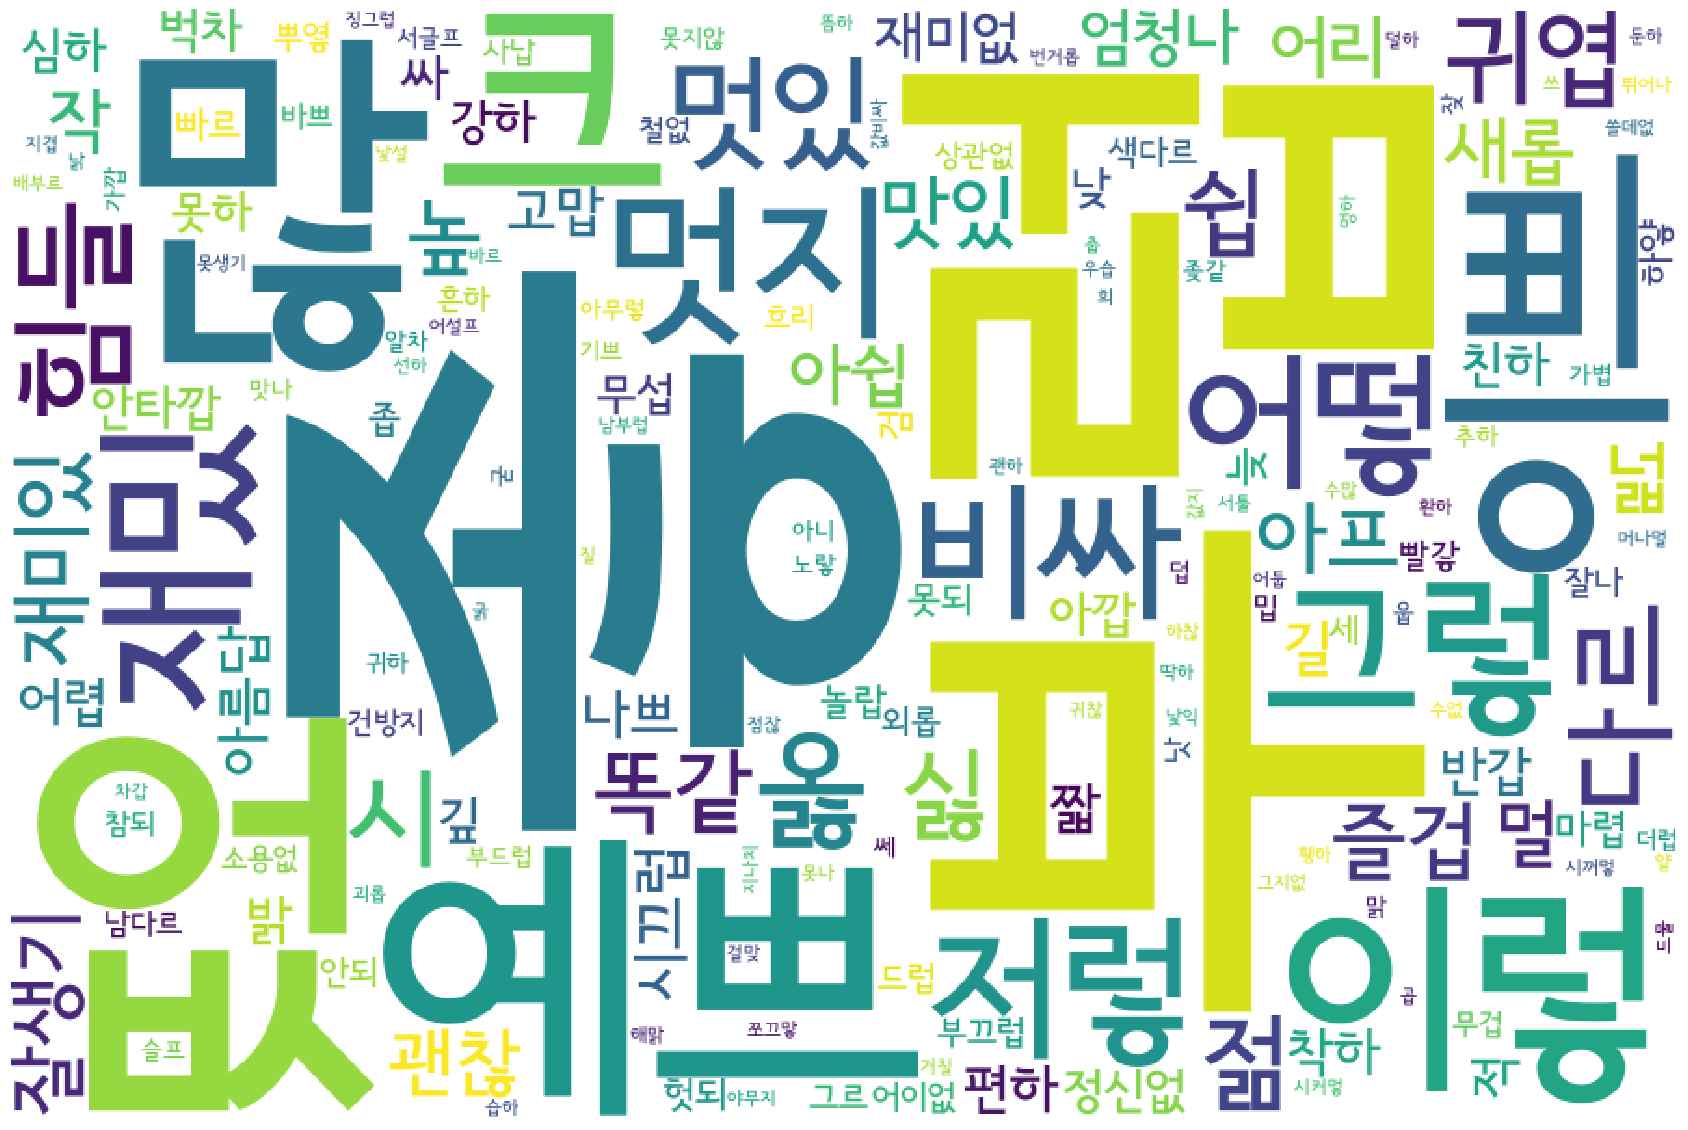

In [16]:
cloud = cloud.fit_words(adj_counts)
fig = plt.figure(figsize=(30, 40))
plt.imshow(cloud)
plt.axis('off')
plt.savefig('category1_adj.jpg')
plt.show()

In [23]:
noun_list = []
for sent in tagged_sentences2:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            noun_list.append(word)
print(len(noun_list))
noun_list2 = [n for n in noun_list if n not in ['!!', '!!!', '영상', '언니', '한별', '우파']]
noun_list2[:10]

28403


['남편', '분이', '누구', '신가', '카레이서', '원피스', '정보', '오늘', '처음', '속']

In [24]:
from collections import Counter
noun_counts = Counter(noun_list2)
noun_counts.most_common()

[('돈', 425),
 ('명품', 400),
 ('사람', 390),
 ('집', 308),
 ('생각', 229),
 ('때', 228),
 ('수저', 173),
 ('말', 167),
 ('하울', 150),
 ('오른쪽', 146),
 ('금', 145),
 ('안', 144),
 ('부자', 131),
 ('아', 127),
 ('행복', 125),
 ('인생', 119),
 ('만족', 118),
 ('가방', 113),
 ('넘', 111),
 ('감사', 111),
 ('부모', 108),
 ('댓글', 107),
 ('오늘', 104),
 ('대리', 101),
 ('일', 94),
 ('느낌', 94),
 ('옷', 92),
 ('정도', 91),
 ('제품', 87),
 ('노력', 87),
 ('브랜드', 87),
 ('이', 84),
 ('가죽', 81),
 ('차', 76),
 ('설명', 75),
 ('삶', 73),
 ('세상', 73),
 ('아파트', 72),
 ('성공', 71),
 ('페라리', 71),
 ('다음', 70),
 ('우', 65),
 ('눈', 64),
 ('기분', 63),
 ('시간', 62),
 ('제가', 62),
 ('한국', 61),
 ('하우스', 61),
 ('디자인', 61),
 ('이번', 60),
 ('가나', 60),
 ('처음', 59),
 ('진짜', 58),
 ('이랑', 58),
 ('최고', 57),
 ('혼자', 57),
 ('카타르', 57),
 ('욕', 56),
 ('트리', 56),
 ('형', 56),
 ('사랑', 55),
 ('존', 55),
 ('티', 55),
 ('남자', 55),
 ('퍼스트', 54),
 ('마제', 54),
 ('대박', 53),
 ('슈퍼카', 53),
 ('곳', 52),
 ('남', 52),
 ('여자', 51),
 ('요', 51),
 ('정보', 50),
 ('구독', 50),
 ('게', 50),
 ('다', 48),
 ('

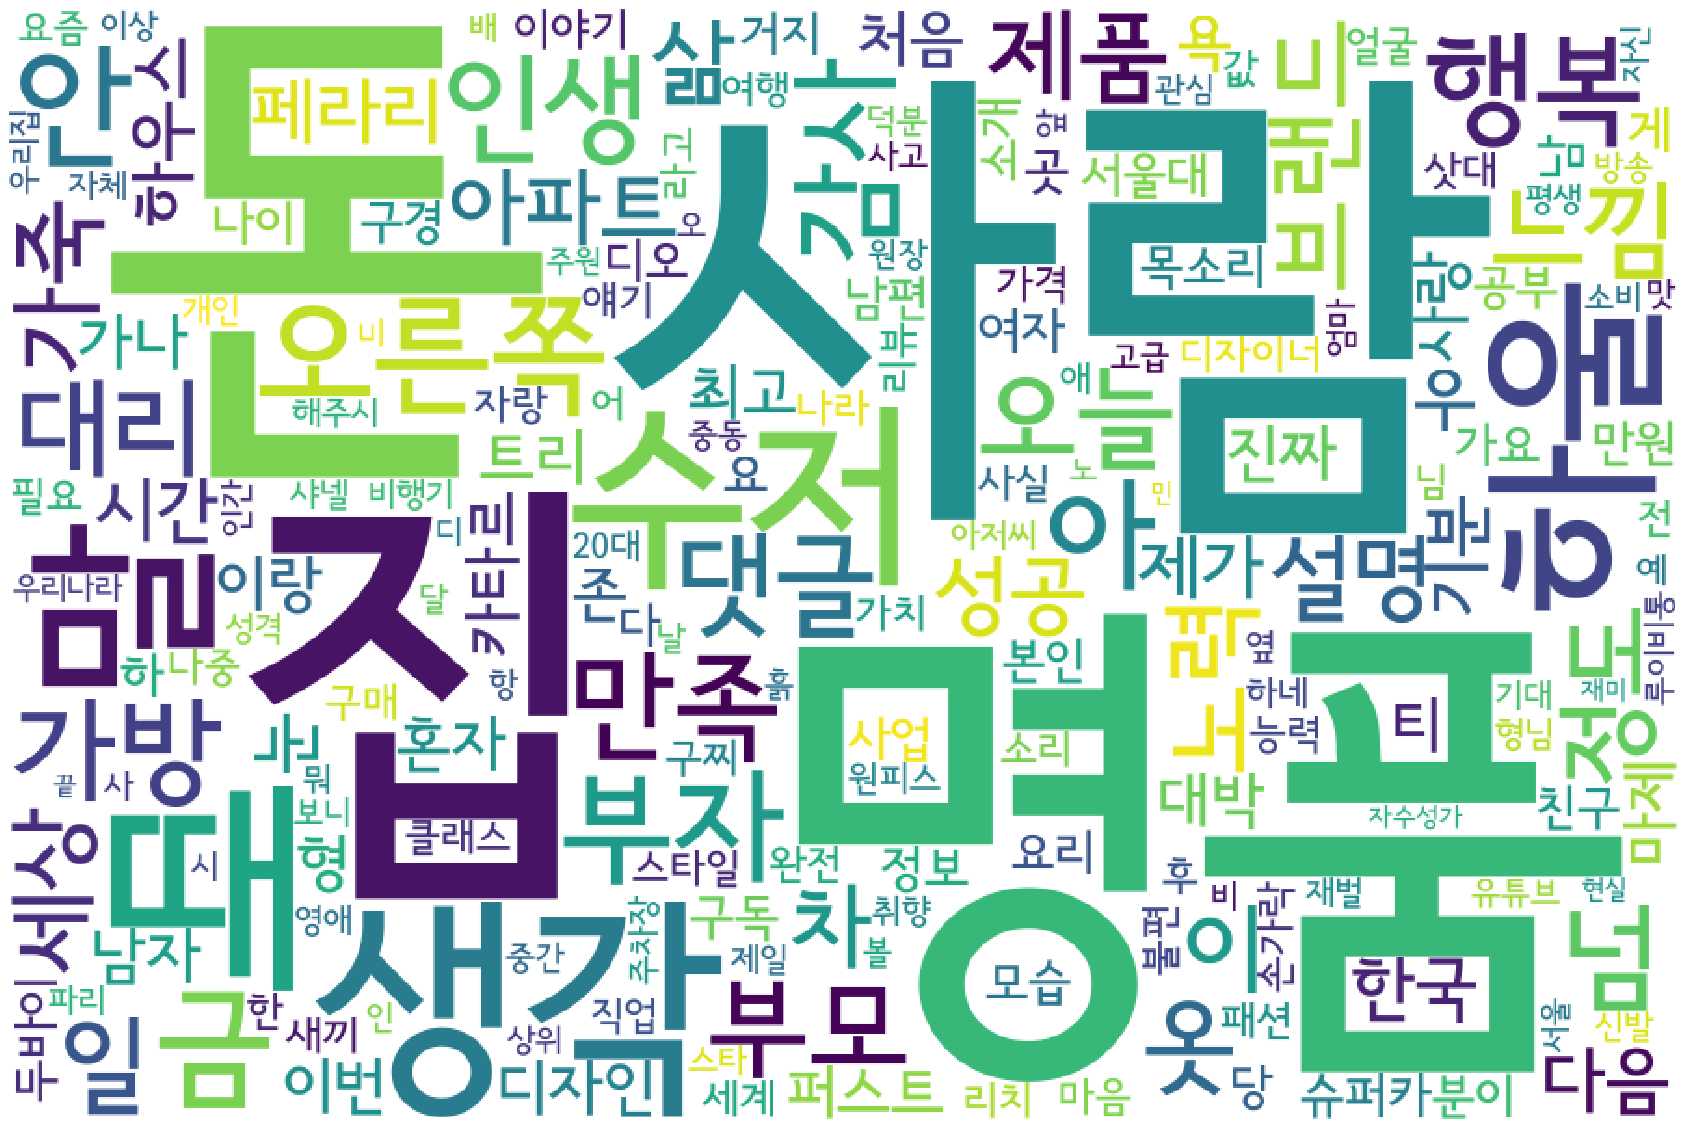

In [25]:
cloud = cloud.fit_words(noun_counts)
fig = plt.figure(figsize=(30, 40))
plt.imshow(cloud)
plt.axis('off')
plt.savefig('category1_noun.jpg')
plt.show()